In [1]:
from rocketpy import Environment, SolidMotor, Rocket, Flight
import datetime

%matplotlib notebook
%matplotlib inline

In [2]:
help(Environment)

Help on class Environment in module rocketpy.Environment:

class Environment(builtins.object)
 |  Environment(railLength, gravity=9.80665, date=None, latitude=0, longitude=0, elevation=0, datum='SIRGAS2000', timeZone='UTC')
 |  
 |  Keeps all environment information stored, such as wind and temperature
 |  conditions, as well as gravity and rail length.
 |  
 |  Attributes
 |  ----------
 |  
 |      Constants
 |      Environment.earthRadius : float
 |          Value of Earth's Radius = 6.3781e6 m.
 |      Environment.airGasConstant : float
 |          Value of Air's Gas Constant = 287.05287 J/K/Kg
 |  
 |      Gravity and Launch Rail Length:
 |      Environment.rl : float
 |          Launch rail length in meters.
 |      Environment.g : float
 |          Positive value of gravitational acceleration in m/s^2.
 |  
 |      Coordinates and Date:
 |      Environment.lat : float
 |          Launch site latitude.
 |      Environment.lon : float
 |          Launch site longitude.
 |      Env

In [17]:
Env = Environment(
    railLength=5,
    gravity=9.80665,
    longitude=37.0144, # East
    latitude=-1.1018, # South
)

tomorrow = datetime.datetime.today() + datetime.timedelta(days=1)

Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 16)) 

Env.setAtmosphericModel(type='Forecast', file='GFS')

C:\Users\0x6f736f646f\OneDrive\Documents\Nakuja\airframeN2\Venv\lib\site-packages\rocketpy\Environment.py:1831: UserWarning: Exact chosen launch time is not available in the provided file, using 2022-03-17 15:00:00 UTC instead.
  warnings.warn(


Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length: 5  m
Launch Date: 2022-03-17 16:00:00 UTC
Launch Site Latitude: -1.10180°
Launch Site Longitude: 37.01440°
Launch Site Surface Elevation: 1553.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 80.068 km
Forecast Time Period: From  2022-03-15 12:00:00  to  2022-03-31 12:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 8.08 m/s
Surface Wind Direction: 72.98°
Surface Wind Heading: 252.98°
Surface Pressure: 841.05 hPa
Surface Temperature: 300.65 K
Surface Air Density: 0.974 kg/m³
Surface Speed of Sound: 347.60 m/s


Atmospheric Model Plots


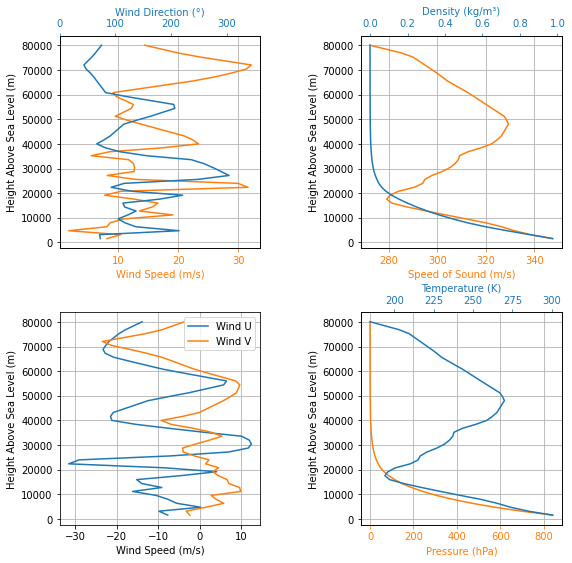

In [18]:
Env.allInfo()

In [19]:
help(SolidMotor)

Help on class SolidMotor in module rocketpy.SolidMotor:

class SolidMotor(builtins.object)
 |  SolidMotor(thrustSource, burnOut, grainNumber, grainDensity, grainOuterRadius, grainInitialInnerRadius, grainInitialHeight, grainSeparation=0, nozzleRadius=0.0335, throatRadius=0.0114, reshapeThrustCurve=False, interpolationMethod='linear')
 |  
 |  Class to specify characteristics and useful operations for solid
 |  motors.
 |  
 |  Attributes
 |  ----------
 |  
 |      Geometrical attributes:
 |      Motor.nozzleRadius : float
 |          Radius of motor nozzle outlet in meters.
 |      Motor.throatRadius : float
 |          Radius of motor nozzle throat in meters.
 |      Motor.grainNumber : int
 |          Number of solid grains.
 |      Motor.grainSeparation : float
 |          Distance between two grains in meters.
 |      Motor.grainDensity : float
 |          Density of each grain in kg/meters cubed.
 |      Motor.grainOuterRadius : float
 |          Outer radius of each grain in met

In [20]:
motor = SolidMotor(
    thrustSource="march_03.csv",
    burnOut=3,
    grainNumber=1,
    grainSeparation=0.001,
    grainDensity=500,
    grainOuterRadius=0.05,
    grainInitialInnerRadius=0.019,
    grainInitialHeight=0.106,
    nozzleRadius=0.025,
    throatRadius=0.012
)

In [21]:
# Calculates total impulse by numerical integration of the thrust curve
motor.evaluateTotalImpulse()

200.60570778750002

Nozzle Details
Nozzle Radius: 0.025 m
Nozzle Throat Radius: 0.012 m

Grain Details
Number of Grains: 1
Grain Spacing: 0.001 m
Grain Density: 500 kg/m3
Grain Outer Radius: 0.05 m
Grain Inner Radius: 0.019 m
Grain Height: 0.106 m
Grain Volume: 0.001 m3
Grain Mass: 0.356 kg

Motor Details
Total Burning Time: 3 s
Total Propellant Mass: 0.356 kg
Propellant Exhaust Velocity: 563.257 m/s
Average Thrust: 66.869 N
Maximum Thrust: 159.409557 N at 1.35 s after ignition.
Total Impulse: 200.606 Ns

Plots


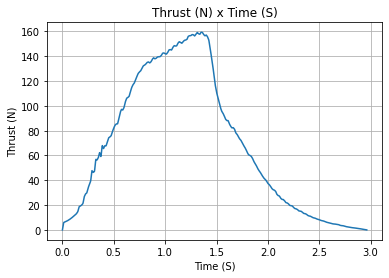

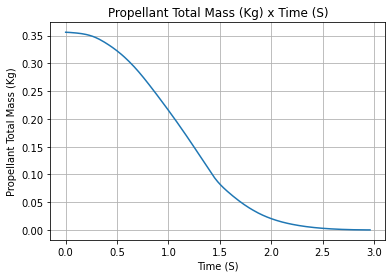

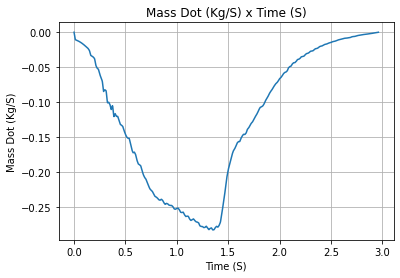

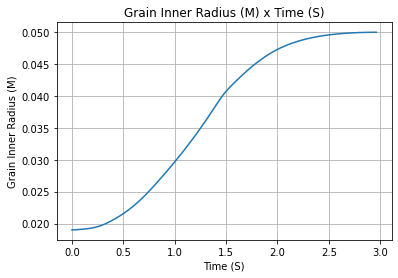

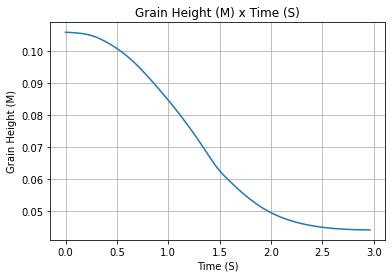

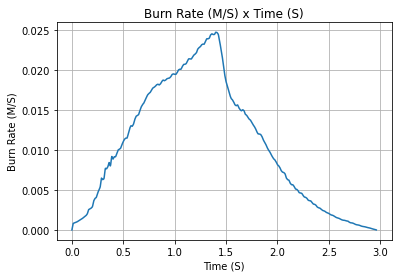

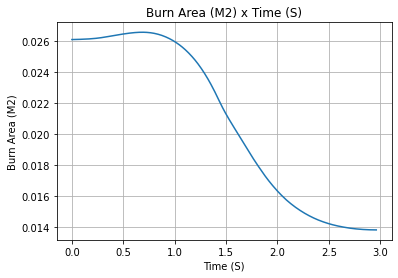

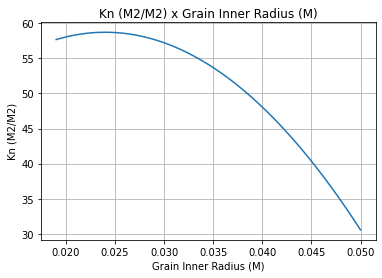

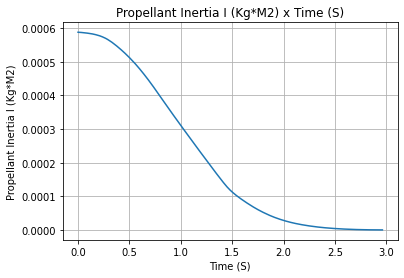

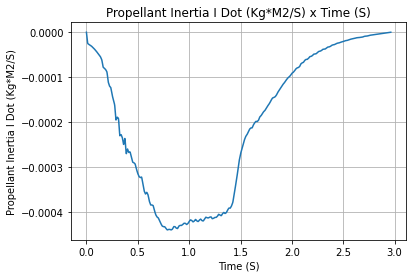

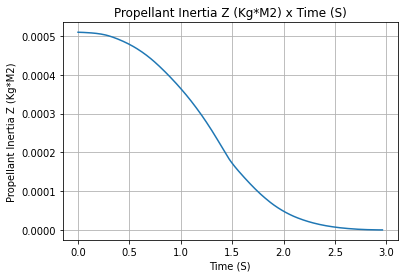

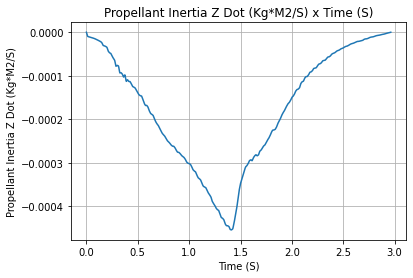

In [22]:
motor.allInfo()

In [23]:
help(Rocket)

Help on class Rocket in module rocketpy.Rocket:

class Rocket(builtins.object)
 |  Rocket(motor, mass, inertiaI, inertiaZ, radius, distanceRocketNozzle, distanceRocketPropellant, powerOffDrag, powerOnDrag)
 |  
 |  Keeps all rocket and parachute information.
 |  
 |  Attributes
 |  ----------
 |      Geometrical attributes:
 |      Rocket.radius : float
 |          Rocket's largest radius in meters.
 |      Rocket.area : float
 |          Rocket's circular cross section largest frontal area in squared
 |          meters.
 |      Rocket.distanceRocketNozzle : float
 |          Distance between rocket's center of mass, without propellant,
 |          to the exit face of the nozzle, in meters. Always positive.
 |      Rocket.distanceRocketPropellant : float
 |          Distance between rocket's center of mass, without propellant,
 |          to the center of mass of propellant, in meters. Always positive.
 |  
 |      Mass and Inertia attributes:
 |      Rocket.mass : float
 |          Ro

In [25]:
# Nakuja = Rocket(
#     motor=motor,
#     radius=0.06,
#     mass=2.269,
#     inertiaI=0.2175,
#     inertiaZ=0.00173,
#     distanceRocketNozzle=-0.411,
#     distanceRocketPropellant=-0.361,
#     powerOffDrag=0.675,
#     powerOnDrag=0.675
# )
Nakuja = Rocket(
    motor=motor,
    radius=127 / 2000,
    mass=19.197 - 2.956,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag=0.675,
    powerOnDrag=0.675,
)

Nakuja.setRailButtons([0.2, -0.5])

In [32]:
# NoseCone = Nakuja.addNose(length=0.18, kind="ogive", distanceToCM=0.437)

# FinSet = Nakuja.addFins(3, span=0.065, rootChord=0.1, tipChord=0.028, distanceToCM=-0.411, cantAngle=0)

# # Tail = Nakuja.addTail(topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656)
NoseCone = Nakuja.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

FinSet = Nakuja.addFins(
    4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956
)

Tail = Nakuja.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)

In [33]:
# def drogueTrigger(p, y):
#     # p = pressure
#     # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
#     # activate drogue when vz < 0 m/s.
#     return True if y[5] < 0 else False


# # def mainTrigger(p, y):
# #     # p = pressure
# #     # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
# #     # activate main when vz < 0 m/s and z < 50 m.
# #     return True if y[5] < 0 and y[2] < 800 else False

# # Nakuja.parachutes.remove(Drogue)
# # Nakuja.parachutes.remove(Main)

# # Main = Nakuja.addParachute("Main", CdS=10.0, trigger=mainTrigger, samplingRate=105, lag=1.5, noise=(0, 8.3, 0.5))

# Drogue = Nakuja.addParachute("Drogue", CdS=1.6, trigger=drogueTrigger, samplingRate=40, lag=2, noise=(0, 8.3, 0.5))

def drogueTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False


def mainTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate main when vz < 0 m/s and z < 800 m.
    return True if y[5] < 0 and y[2] < 800 else False


Main = Nakuja.addParachute(
    "Main",
    CdS=10.0,
    trigger=mainTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = Nakuja.addParachute(
    "Drogue",
    CdS=1.0,
    trigger=drogueTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)


In [34]:
TestFlight = Flight(rocket=Nakuja, environment=Env, inclination=85, heading=0, verbose=True)

Simulation Completed at Time: 600.0000 s


In [35]:
TestFlight.printInitialConditionsData()

Position - x: 0.00 m | y: 0.00 m | z: 1553.46 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1553.46 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: -2.40 m/s
Lateral Surface Wind Speed: 7.71 m/s


 Rail Departure State

Rail Departure Time: 0.000 s
Rail Departure Velocity: 0.000 m/s
Rail Departure Static Margin: 1.594 c
Rail Departure Angle of Attack: 88.517°
Rail Departure Thrust-Weight Ratio: 0.000
Rail Departure Reynolds Number: 5.406e+04


BurnOut State

BurnOut time: 3.000 s
Altitude at burnOut: 0.000 m (AGL)
Rocket velocity at burnOut: 0.000 m/s
Freestream velocity at burnOut: 8.077 m/s
Mach Number at burnOut: 0.023
Kinetic energy at burnOut: 0.000e+00 J


Apogee

Apogee 

C:\Users\0x6f736f646f\OneDrive\Documents\Nakuja\airframeN2\Venv\lib\site-packages\rocketpy\Flight.py:2397: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax1.set_zlim3d([0, maxZ])
C:\Users\0x6f736f646f\OneDrive\Documents\Nakuja\airframeN2\Venv\lib\site-packages\rocketpy\Flight.py:2398: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax1.set_ylim3d([minXY, maxXY])
C:\Users\0x6f736f646f\OneDrive\Documents\Nakuja\airframeN2\Venv\lib\site-packages\rocketpy\Flight.py:2399: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax1.set_xlim3d([minXY, maxXY])


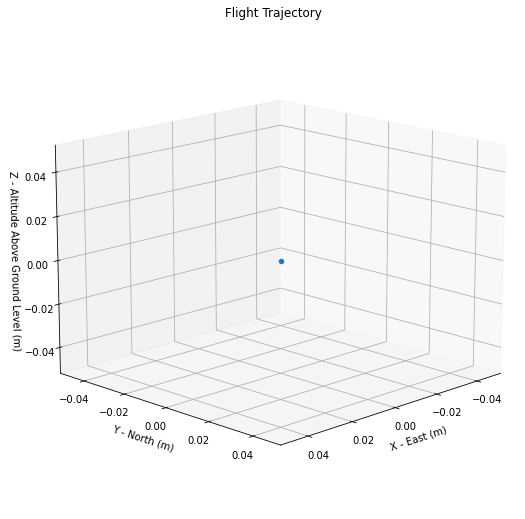



Trajectory Kinematic Plots



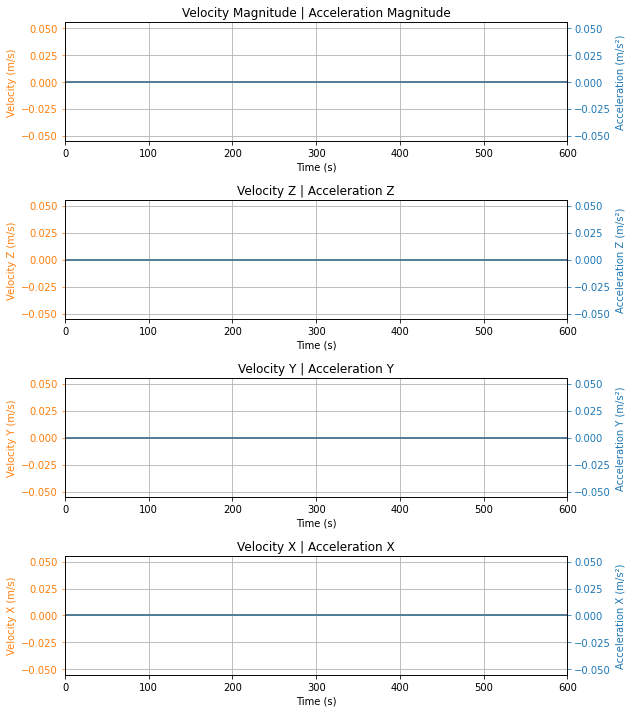



Angular Position Plots



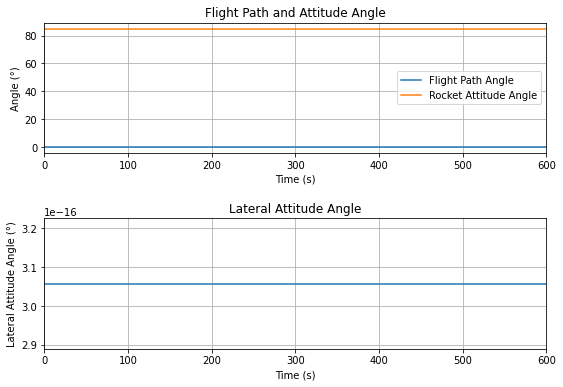



Path, Attitude and Lateral Attitude Angle plots



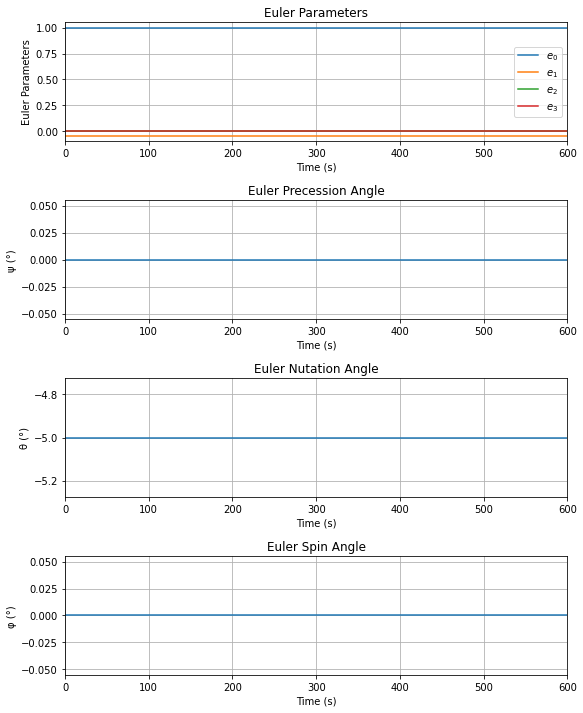



Trajectory Angular Velocity and Acceleration Plots



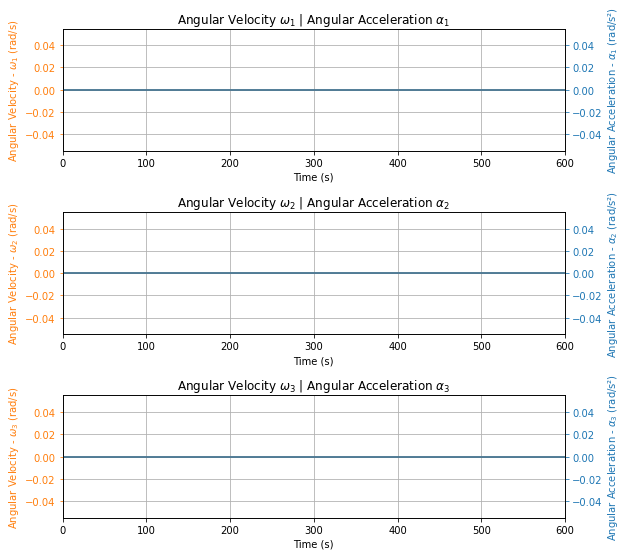



Trajectory Force Plots



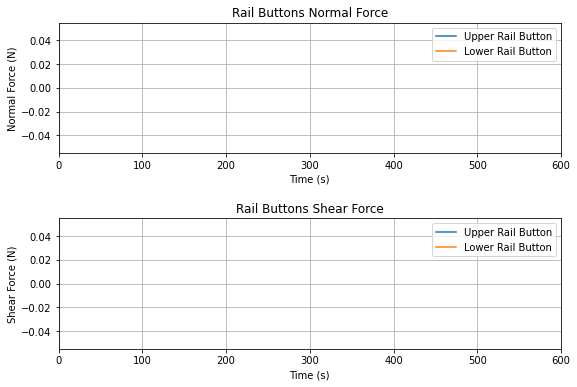

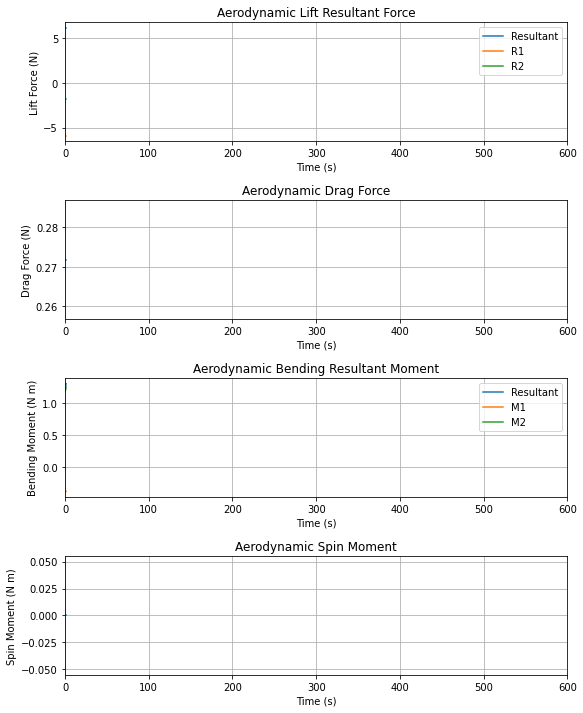



Trajectory Energy Plots



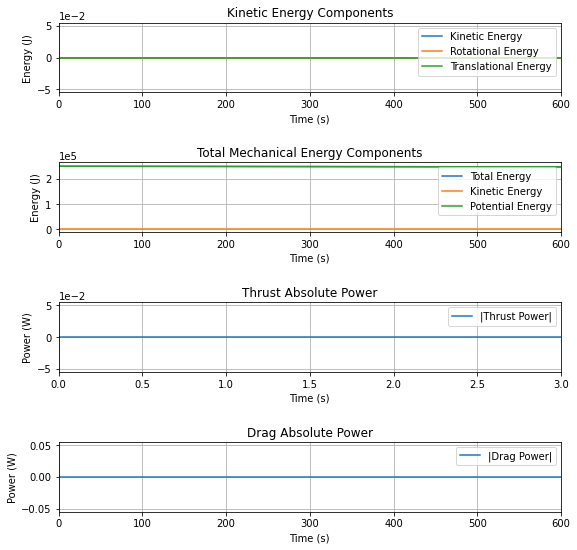



Trajectory Fluid Mechanics Plots



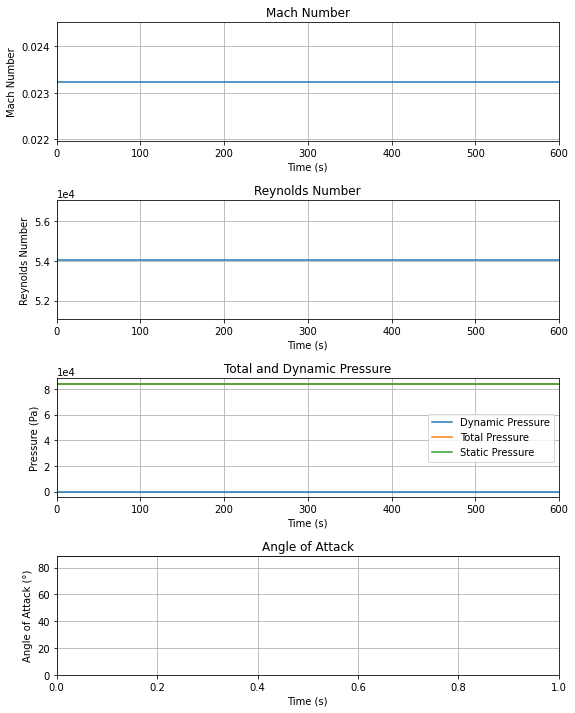



Trajectory Stability and Control Plots



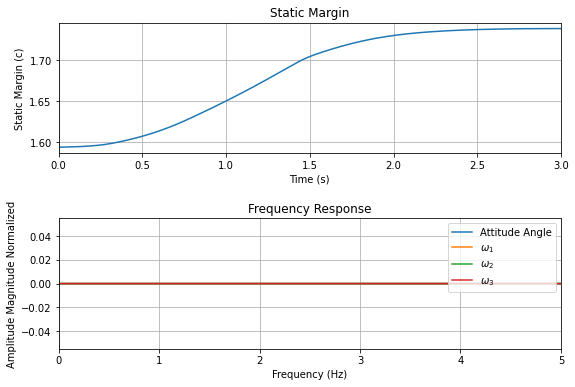

In [36]:
TestFlight.allInfo()
